In [19]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
f = h5py.File("hubbard_exact.h5", "r")
df = pd.read_csv("hubbard_eigenvalues.csv", index_col="i")

In [21]:
exact_energy = np.min(f["energies"]).real
print(f"Ground state energy from FCI = {exact_energy}")

Ground state energy from FCI = -1.2360679774997896


In [22]:
print(df.head())

   d           eps    energy
i                           
0  3  1.000000e-08 -0.801211
1  3  1.000000e-07 -0.801211
2  3  1.000000e-06 -0.801211
3  3  1.000000e-05 -0.801211
4  4  1.000000e-08 -0.977942


In [23]:
df["error"] = abs(df["energy"] - exact_energy) / abs(exact_energy)

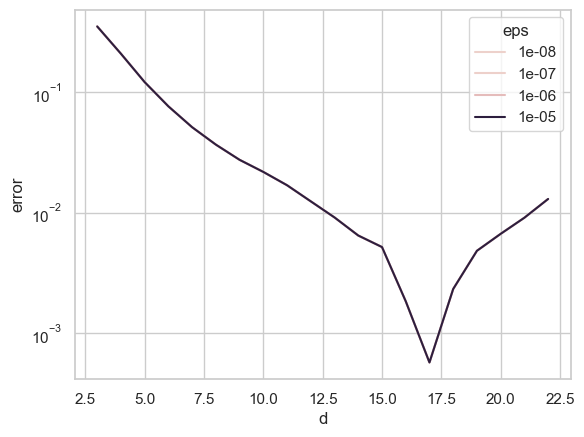

<Figure size 640x480 with 0 Axes>

In [24]:
sns.set_theme(context="notebook", style="whitegrid")
ax = sns.lineplot(data=df, x="d", y="error", hue="eps")
ax.set_yscale("log")
plt.show()
plt.savefig("subspace_error.pdf")